# scRNAseq_keloid_integrate_KF3_KF2_KF_NF1_NF2_NF3_resubClustering_Fib

In [1]:
rm(list=ls())
gc()
library(Seurat)

used   (Mb) gc trigger (Mb) max used (Mb)
Ncells 532330 28.5 1200052    64.1  641780  34.3
Vcells 991474  7.6 8388608    64.0 1754429  13.4

In [2]:
setwd("/mnt/dfc_data1/project/hobart/hospital/scRNAseq_keloid/allSample/integrate.KF1.KF2.KF3.NF1.NF2.NF3.dataset/Fib")

In [3]:
load("/Project_directory/allSample/NF1/NF1.fib.seurat.object.Rdata")
load("/Project_directory/allSample/NF2/NF2.fib.seurat.object.Rdata")
load("/Project_directory/allSample/NF3/NF3.fib.seurat.object.Rdata")
load("/Project_directory/allSample/KF1/KF1.fib.seurat.object.Rdata")
load("/Project_directory/allSample/KF2/KF2.fib.seurat.object.Rdata")
load("/Project_directory/allSample/KF3/KF3.fib.seurat.object.Rdata")

In [4]:
table(NF1.fib$dataset)
table(NF2.fib$dataset)
table(NF3.fib$dataset)
table(KF1.fib$dataset)
table(KF2.fib$dataset)
table(KF3.fib$dataset)


 NF1 
3601 


 NF2 
3022 


 NF3 
1092 


 KF1 
1811 


 KF2 
1846 


 KF3 
2105 

In [5]:
integrate.all.NF.all.KF.fib.list=list(KF1.fib,KF2.fib,KF3.fib,NF1.fib,NF2.fib,NF3.fib)
for(i in 1:length(integrate.all.NF.all.KF.fib.list)){
  integrate.all.NF.all.KF.fib.list[[i]]=NormalizeData(integrate.all.NF.all.KF.fib.list[[i]], normalization.method = "LogNormalize", scale.factor = 10000)
  integrate.all.NF.all.KF.fib.list[[i]]=FindVariableFeatures(integrate.all.NF.all.KF.fib.list[[i]], selection.method = "vst", nfeatures = 2000)
}

In [6]:
integrate.all.NF.all.KF.fib.anchors <- FindIntegrationAnchors(object.list = integrate.all.NF.all.KF.fib.list, dims = 1:30)
integrate.all.NF.all.KF.fib <- IntegrateData(anchorset = integrate.all.NF.all.KF.fib.anchors, dims = 1:30)

Warning message in CheckDuplicateCellNames(object.list = object.list):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”Computing 2000 integration features
Scaling features for provided objects
Finding all pairwise anchors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 5072 anchors
Filtering anchors
	Retained 4155 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 4954 anchors
Filtering anchors
	Retained 3719 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 5453 anchors
Filtering anchors
	Retained 4315 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 6418 anchors
Filtering anchors
	Retained 3669 anchors
Extracting within-dataset neighbors
Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 6688 

In [9]:
DefaultAssay(integrate.all.NF.all.KF.fib) <- "integrated"
integrate.all.NF.all.KF.fib <- ScaleData(integrate.all.NF.all.KF.fib, verbose = FALSE)
integrate.all.NF.all.KF.fib <- RunPCA(integrate.all.NF.all.KF.fib, npcs = 30, verbose = FALSE)
integrate.all.NF.all.KF.fib <- RunUMAP(integrate.all.NF.all.KF.fib, reduction = "pca", dims = 1:20)
integrate.all.NF.all.KF.fib <- FindNeighbors(integrate.all.NF.all.KF.fib, dims = 1:20)
integrate.all.NF.all.KF.fib <- FindClusters(integrate.all.NF.all.KF.fib, resolution = 0.45)
integrate.all.NF.all.KF.fib <- RunTSNE(object = integrate.all.NF.all.KF.fib, dims.use = 1:20, do.fast = TRUE)

10:38:37 UMAP embedding parameters a = 0.9922 b = 1.112
10:38:37 Read 13477 rows and found 20 numeric columns
10:38:37 Using Annoy for neighbor search, n_neighbors = 30
10:38:37 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
10:38:39 Writing NN index file to temp file /tmp/RtmpJL5CKQ/file4b067c7210c9
10:38:39 Searching Annoy index using 1 thread, search_k = 3000
10:38:44 Annoy recall = 100%
10:38:44 Commencing smooth kNN distance calibration using 1 thread
10:38:45 Initializing from normalized Laplacian + noise
10:38:46 Commencing optimization for 200 epochs, with 581502 positive edges
10:39:01 Optimization finished
Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13477
Number of edges: 506175

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8678
Number of communities: 13
Elapsed time: 1 seconds


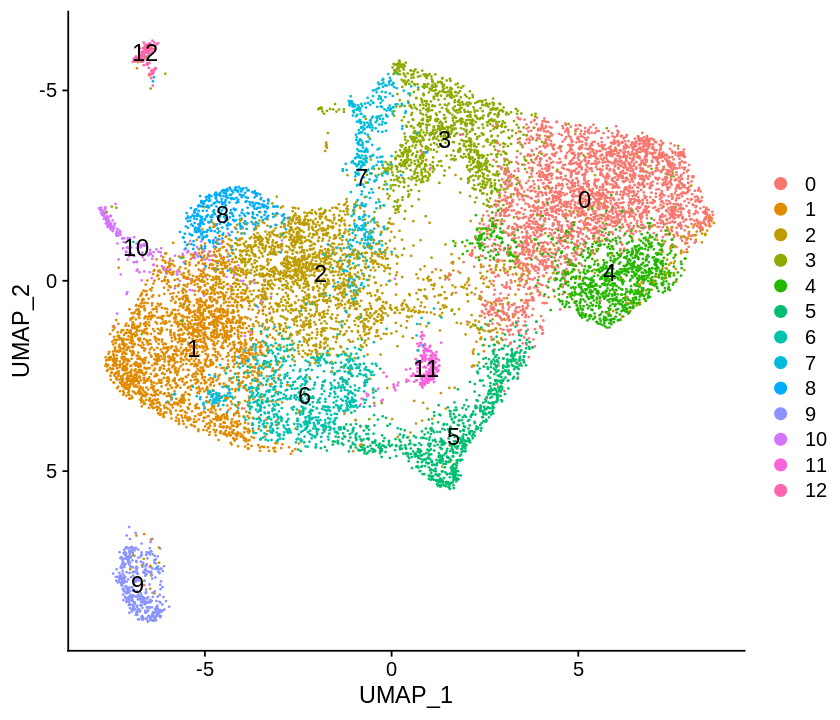

In [10]:
library(cowplot)
library(ggplot2)
options(repr.plot.width=7,repr.plot.height=6)
DimPlot(integrate.all.NF.all.KF.fib, reduction = "umap",label = T,label.size = 5)+scale_y_reverse()

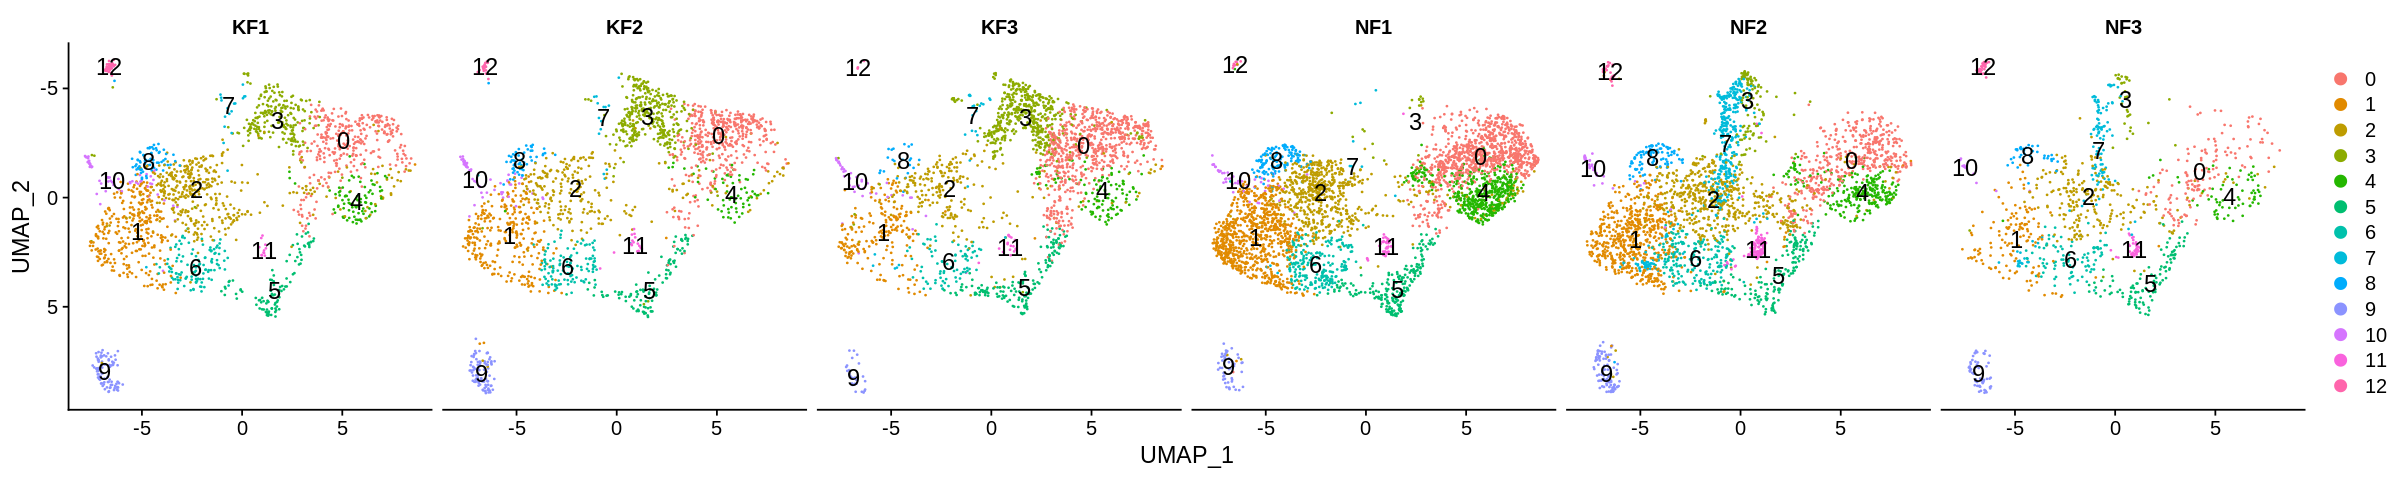

In [11]:
options(repr.plot.width=20,repr.plot.height=4)
DimPlot(integrate.all.NF.all.KF.fib, reduction = "umap",label = T,label.size = 5,split.by = "dataset")+scale_y_reverse()

In [12]:
DefaultAssay(integrate.all.NF.all.KF.fib)="RNA"

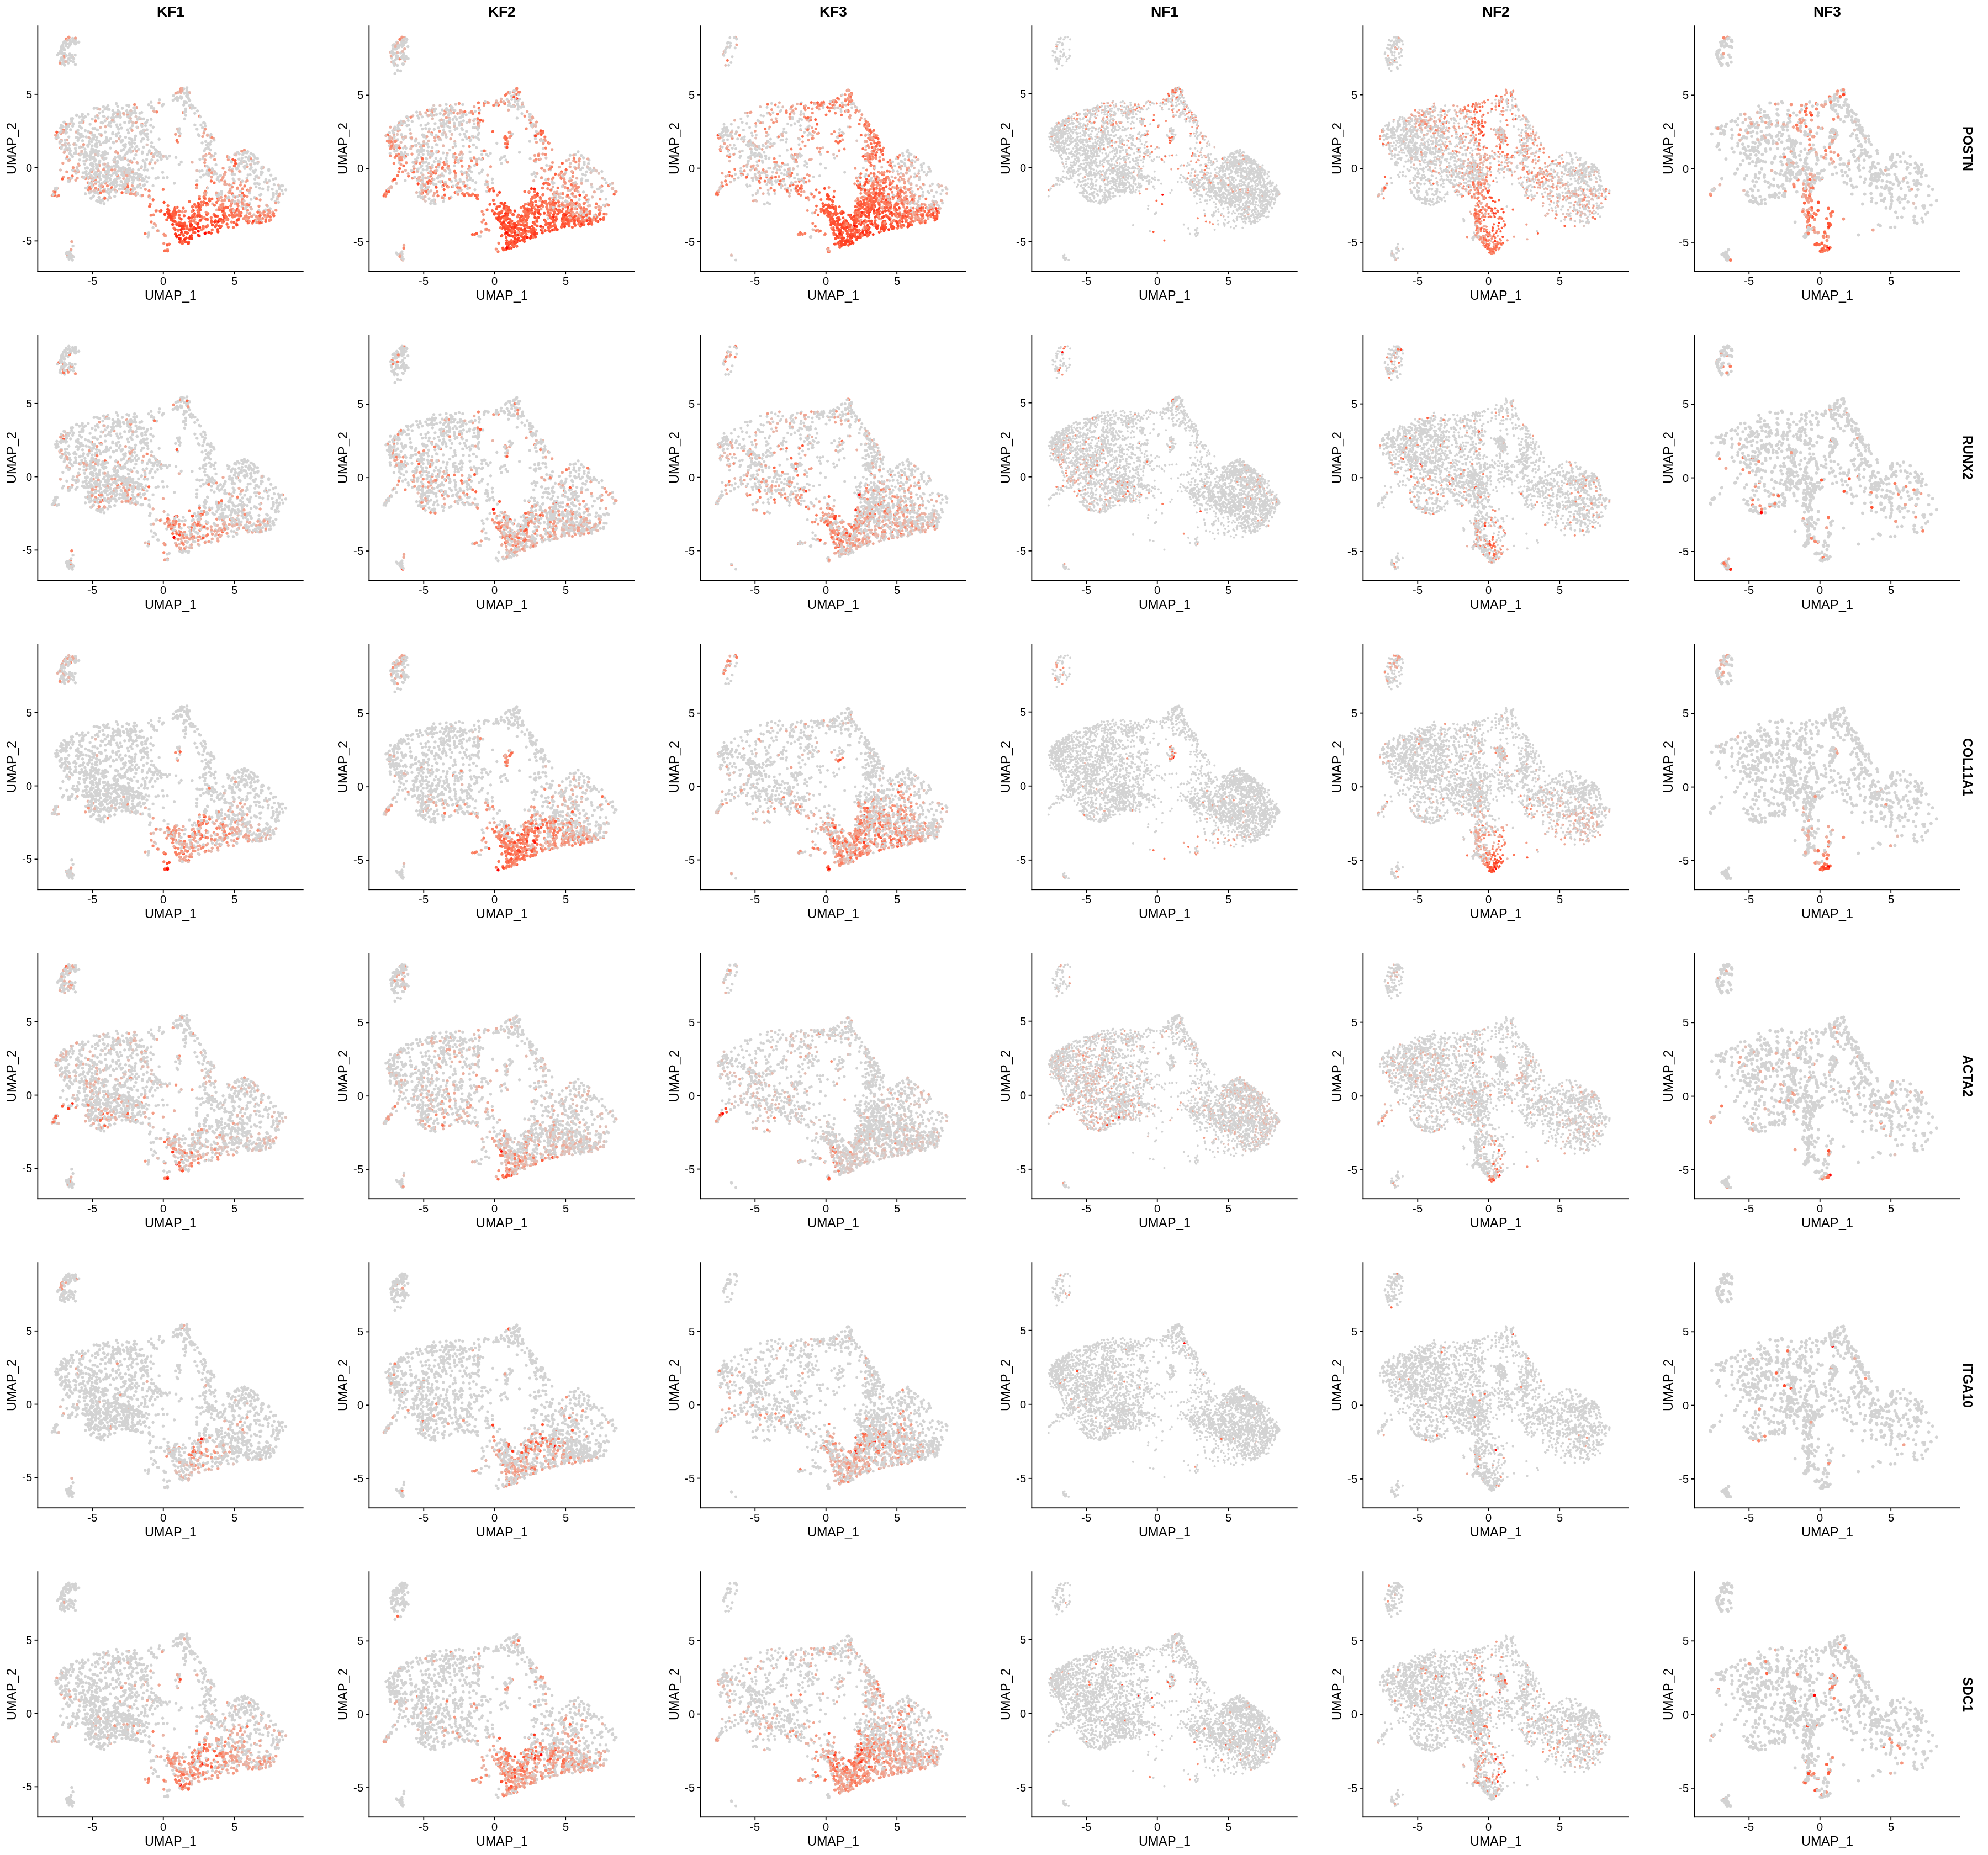

In [13]:
options(repr.plot.width=30,repr.plot.height=28)
FeaturePlot(integrate.all.NF.all.KF.fib, features = c("POSTN","RUNX2","COL11A1","ACTA2","ITGA10","SDC1"),split.by = "dataset",cols=c("lightgrey", "red"))

In [14]:
save(integrate.all.NF.all.KF.fib,file="integrate.all.NF.all.KF.fib.seurat.object.Rdata")

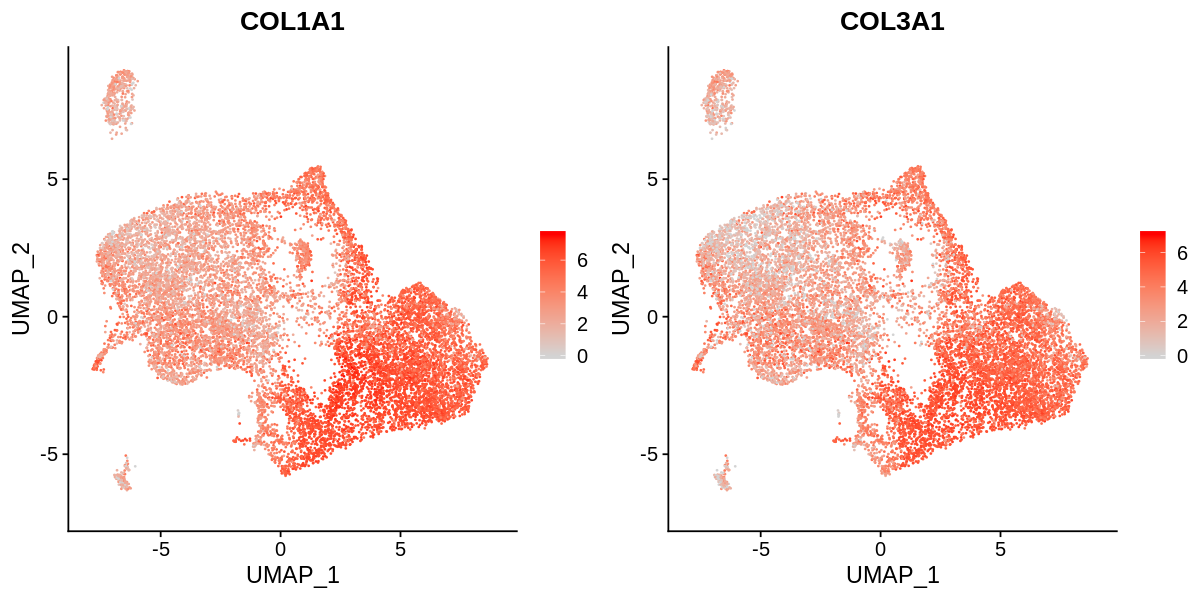

In [15]:
options(repr.plot.width=10,repr.plot.height=5)
FeaturePlot(integrate.all.NF.all.KF.fib, features = c("COL1A1","COL3A1"),nc=2,cols=c("lightgrey", "red"))

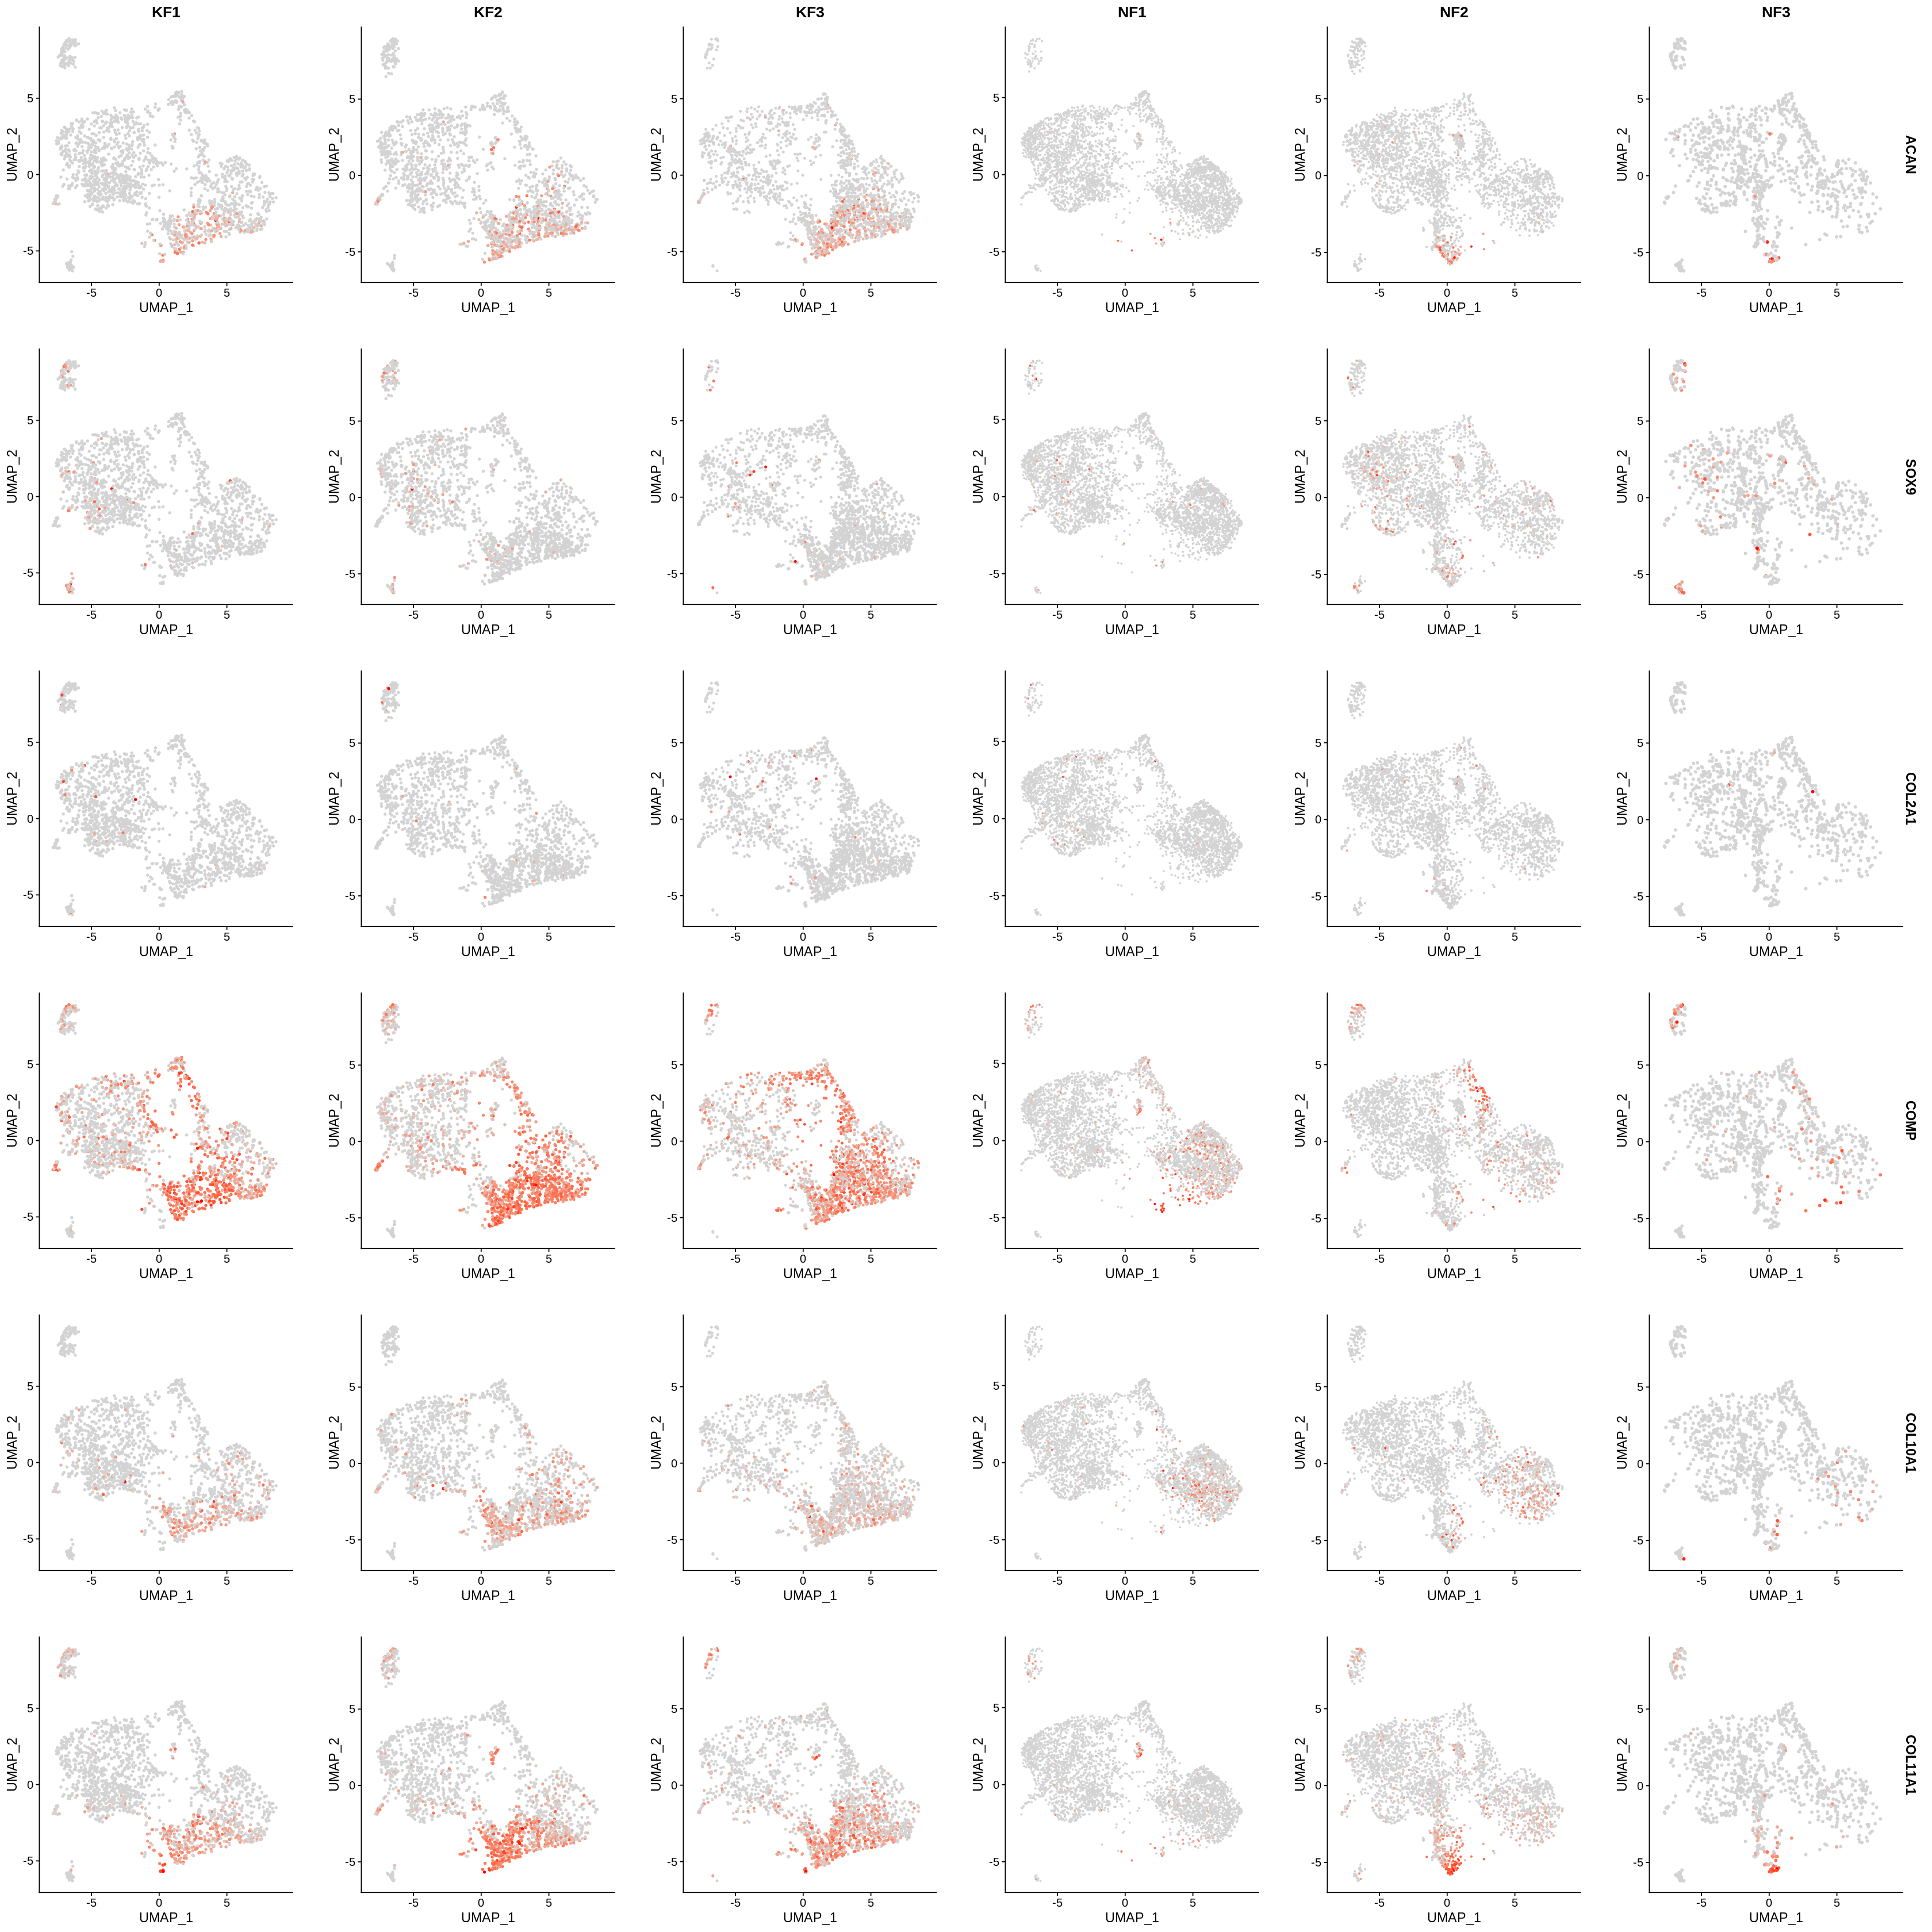

In [16]:
options(repr.plot.width=28,repr.plot.height=28)
FeaturePlot(integrate.all.NF.all.KF.fib, features = c("ACAN","SOX9","COL2A1","COMP","COL10A1","COL11A1"),split.by = "dataset",cols=c("lightgrey", "red"))

In [18]:
library(plyr)
integrate.all.NF.all.KF.fib.stat=as.data.frame(table(integrate.all.NF.all.KF.fib$integrated_snn_res.0.45,integrate.all.NF.all.KF.fib$dataset))
integrate.all.NF.all.KF.fib.stat.prop=ddply(integrate.all.NF.all.KF.fib.stat,"Var2",transform,Ratio=Freq/sum(Freq))
head(integrate.all.NF.all.KF.fib.stat.prop)

Var1 Var2 Freq Ratio     
1 0    KF1  318  0.17559359
2 1    KF1  304  0.16786306
3 2    KF1  396  0.21866372
4 3    KF1  213  0.11761458
5 4    KF1   88  0.04859194
6 5    KF1   98  0.05411375

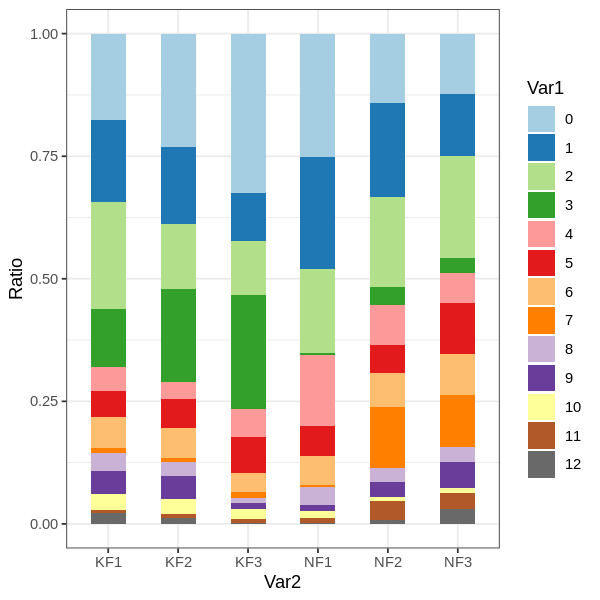

In [20]:
library(ggplot2)
options(repr.plot.width=5,repr.plot.height=5)
selCols=c("#a6cee3","#1f78b4","#b2df8a","#33a02c","#fb9a99","#e31a1c","#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#ffff99","#b15928","#696969")
ggplot(integrate.all.NF.all.KF.fib.stat.prop,aes(x=Var2,y=Ratio,fill=Var1))+geom_bar(stat="identity",width = 0.5)+scale_fill_manual(values = selCols)+theme_bw()